In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Load your dataset
df = pd.read_csv("/content/online_shoppers_intention.csv")
df.head()
# Check for missing values
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [37]:
# Convert boolean columns to integers
df["Weekend"] = df["Weekend"].astype(int)
# Convert 'Revenue' to integer and replace value 2 with 1
df["Revenue"] = df["Revenue"].astype(int).replace(2, 1)
print(df[["Weekend", "Revenue"]].dtypes)
print(df['Revenue'].unique())

Weekend    int64
Revenue    int64
dtype: object
[0 1]


In [38]:
# Identify categorical (object) columns
cat_cols = df.select_dtypes(include='object').columns
print("Categorical columns:\n", cat_cols)

Categorical columns:
 Index(['Month', 'VisitorType'], dtype='object')


In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 1   
1         0.00       0.10         0.0         0.0      2

In [5]:
df = pd.get_dummies(df, columns=cat_cols)
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_3  Month_4  \
0         0.20       0.20         0.0         0.0  ...    False    False   
1         0.00       0.10         0.0         0.0  ...    Fa

In [6]:
# Separate features (X) and target (y)
X = df.drop('Revenue', axis=1)
y = df['Revenue']
# Final preprocessed dataset
print(X.head())
print(y.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_3  Month_4  \
0         0.20       0.20         0.0         0.0  ...    False    False   
1         0.00       0.10         0.0         0.0  ...    Fa

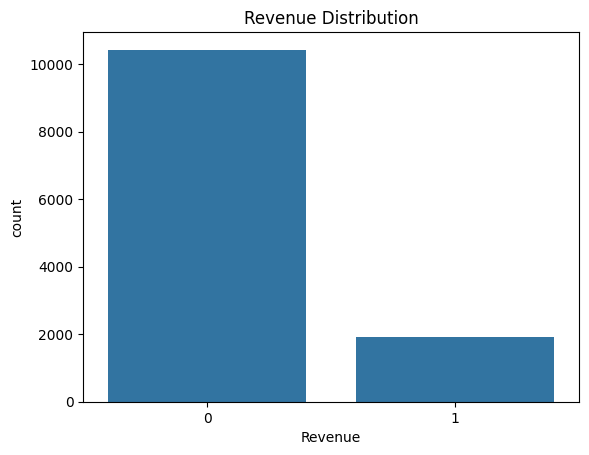

In [40]:
#visualization
#target variable distribution(revenue)
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='Revenue')
plt.title("Revenue Distribution")
plt.show()

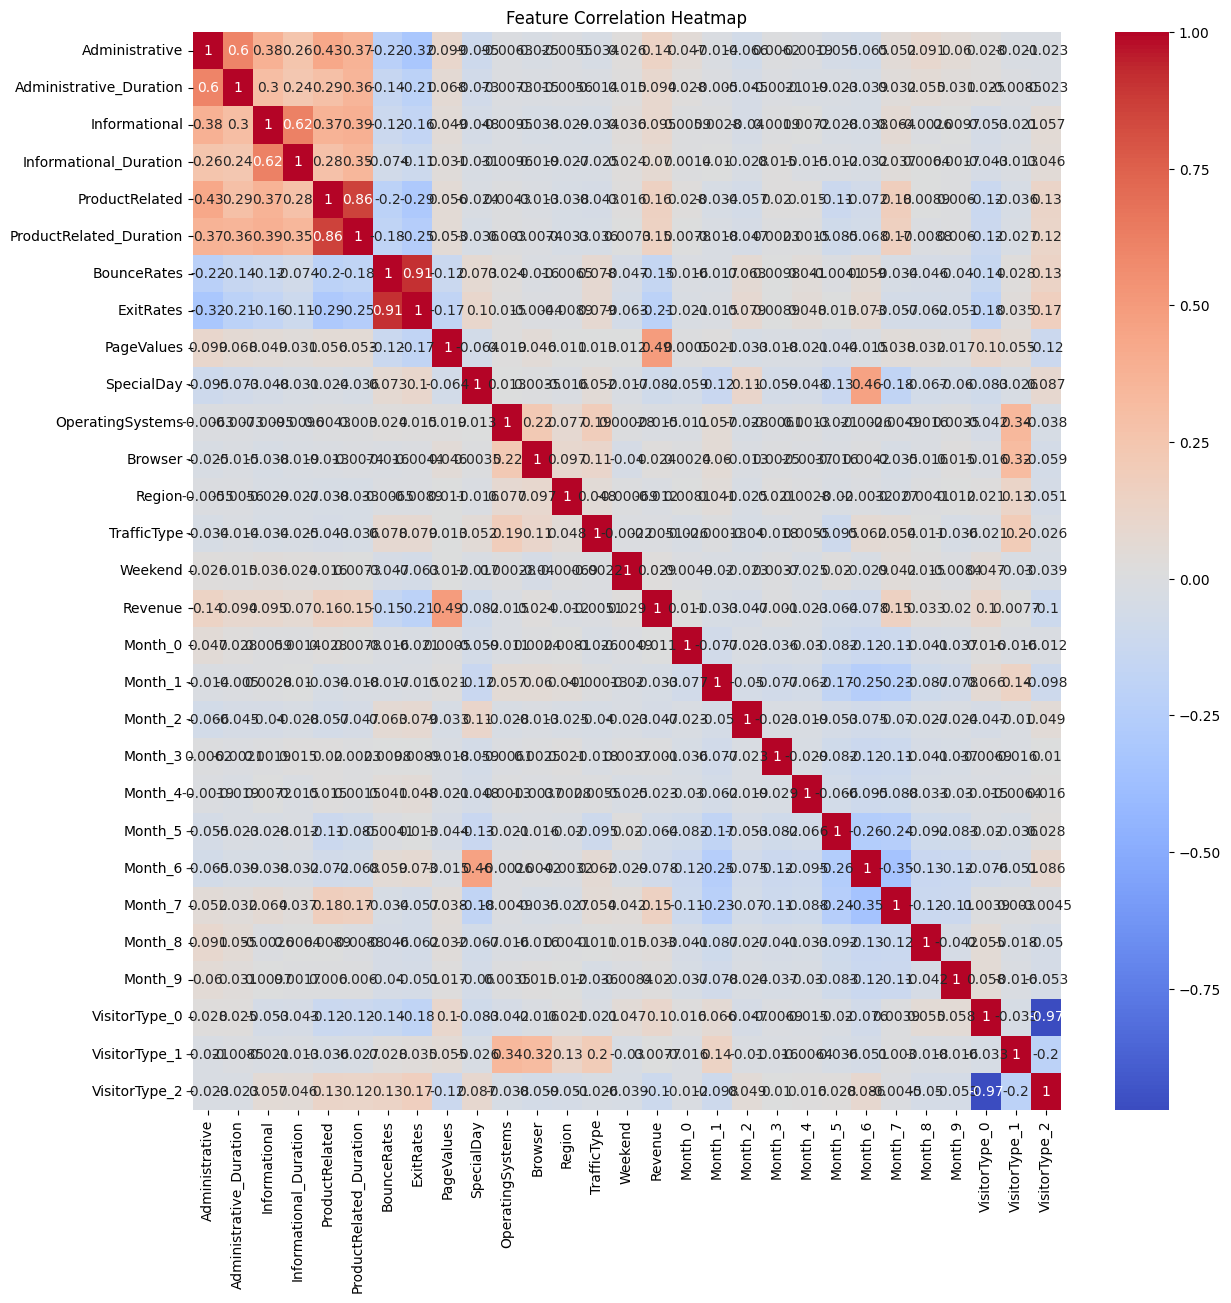

In [8]:
#correlation heatmap(before scaling)
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

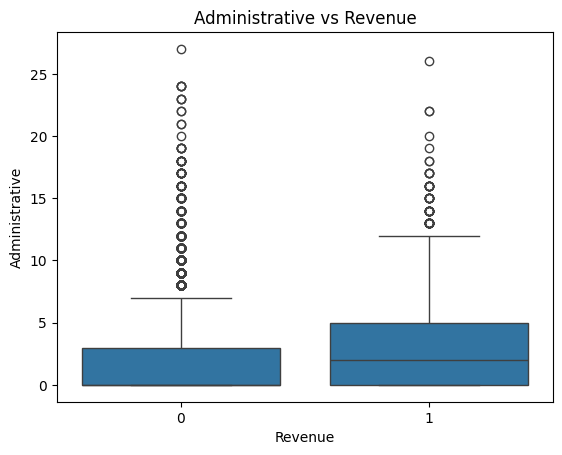

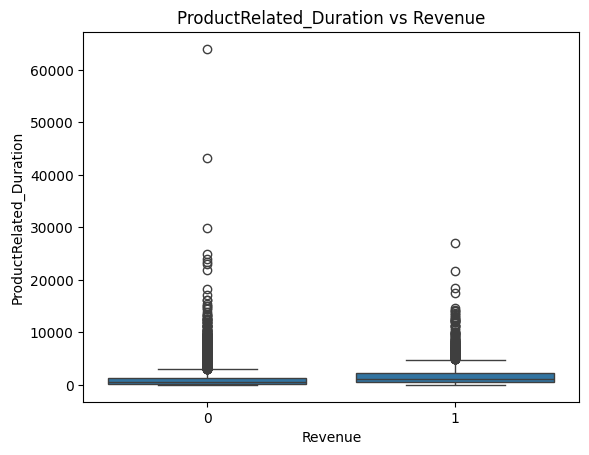

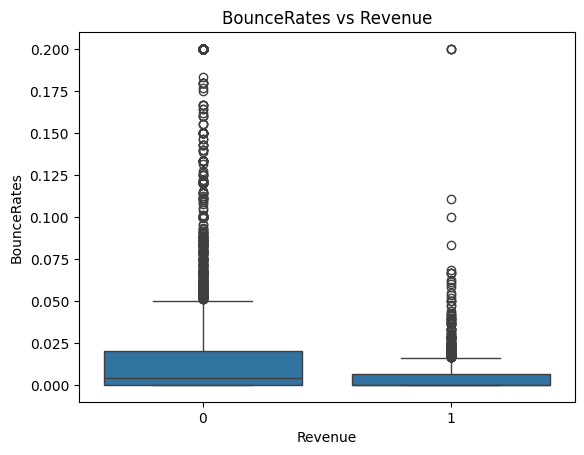

In [9]:
#boxplots of important features vs revenue
features = ['Administrative', 'ProductRelated_Duration', 'BounceRates']
for col in features:
    sns.boxplot(data=df, x='Revenue', y=col)
    plt.title(f"{col} vs Revenue")
    plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
numeric_cols = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]

In [11]:
# Z-Score Method (Standard Deviation Based)
from scipy.stats import zscore
import numpy as np
# Compute Z-scores for numeric columns
z_scores = np.abs(zscore(df[numeric_cols]))
# Flag entries with any z-score > 3 as outliers
outliers_z = (z_scores > 3).any(axis=1)
# Number of outliers
print(f"Z-score outliers found: {outliers_z.sum()}")

Z-score outliers found: 2301


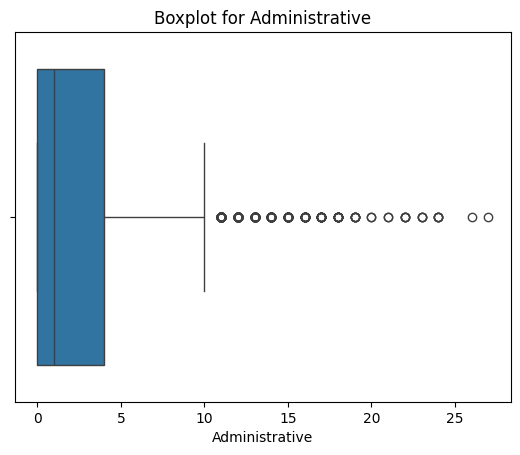

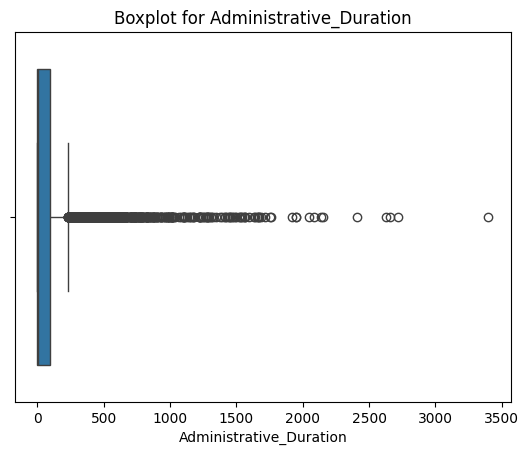

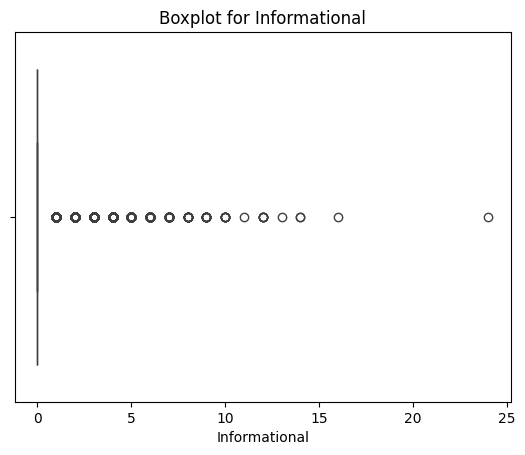

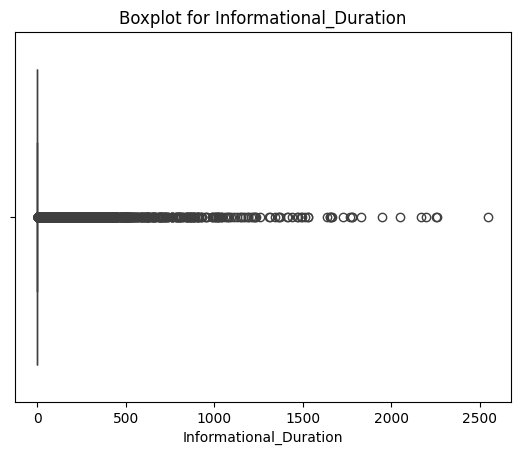

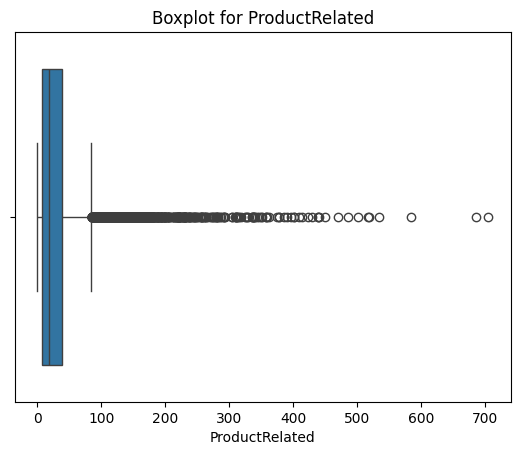

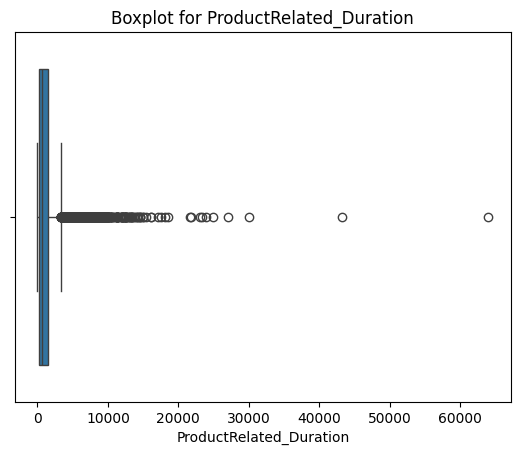

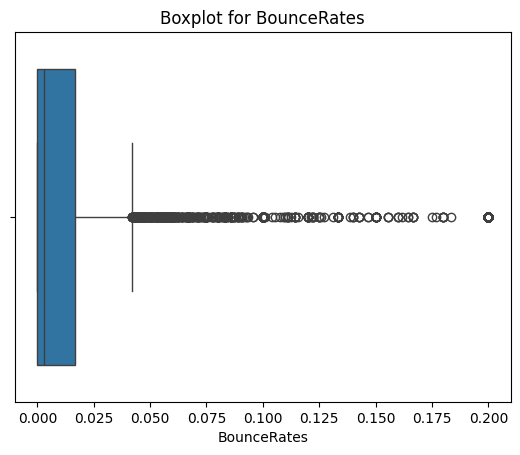

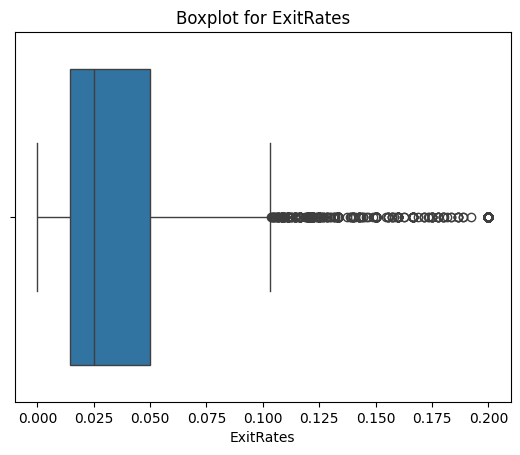

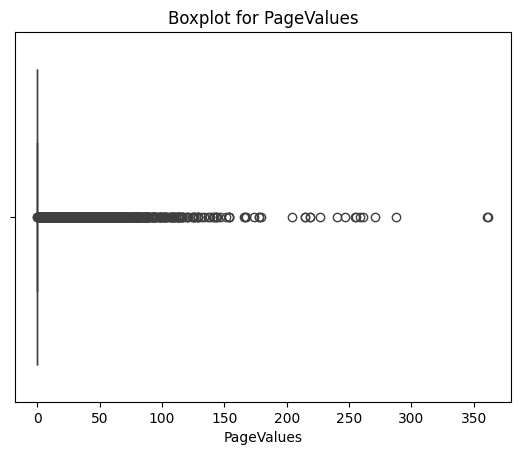

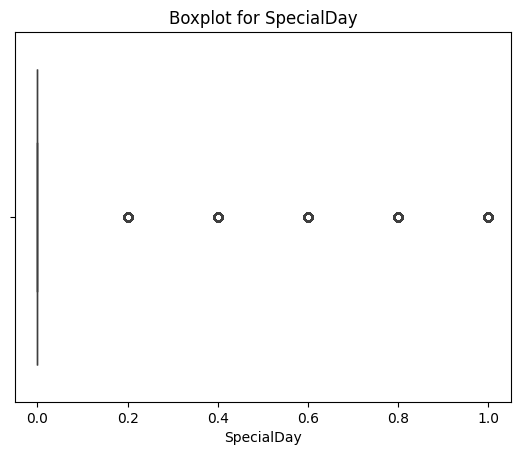

In [12]:
# Visual Outlier Detection
#Boxplot (Univariate)
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()

In [13]:
# Ensure 'Revenue' is treated as the target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

In [18]:
# If it's boolean True/False
df['Revenue'] = df['Revenue'].astype(int)

# If it's strings like 'TRUE', 'FALSE'
# df['Revenue'] = df['Revenue'].map({'TRUE': 1, 'FALSE': 0})

In [42]:
print(df['Revenue'].value_counts())

Revenue
0    10422
1     1908
Name: count, dtype: int64


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler
# Scale the features (X) only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# The target variable (y) should not be scaled for classification
y_train_ready = y_train # Use y_train directly for training
y_test_ready = y_test   # Use y_test directly for testing
print(y_train_ready.shape)
print(y_test_ready.shape)

(9864,)
(2466,)


In [45]:
print(df['Revenue'].unique())  # Should show: [0 1]

[0 1]


RANDOM FOREST

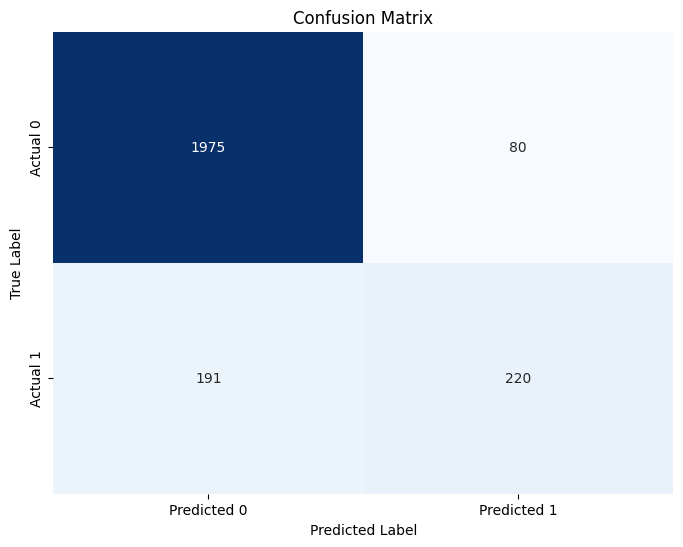

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.73      0.54      0.62       411

    accuracy                           0.89      2466
   macro avg       0.82      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466



In [46]:
#randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train_ready)
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
# Calculate the confusion matrix
cm = confusion_matrix(y_test_ready, y_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))

LOGISTIC REGRESSION

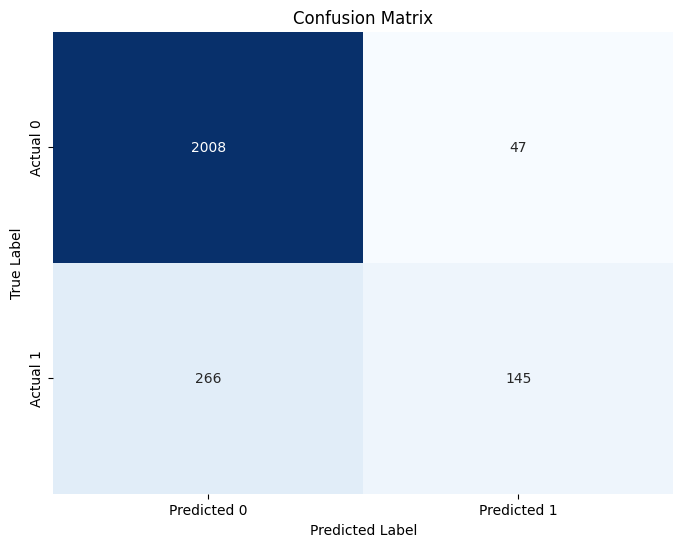

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2055
           1       0.76      0.35      0.48       411

    accuracy                           0.87      2466
   macro avg       0.82      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466



In [47]:
#logisticregression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression()
model.fit(X_train_scaled, y_train_ready)
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
# Calculate the confusion matrix
cm = confusion_matrix(y_test_ready, y_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))

SVM

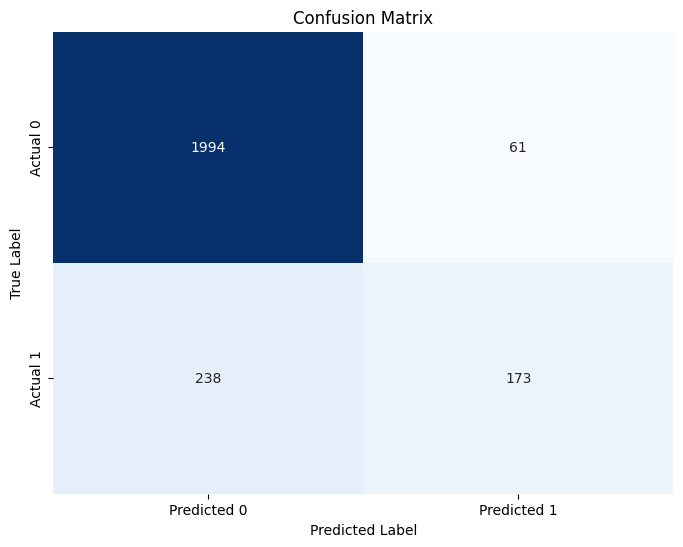

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2055
           1       0.74      0.42      0.54       411

    accuracy                           0.88      2466
   macro avg       0.82      0.70      0.73      2466
weighted avg       0.87      0.88      0.86      2466



In [48]:
#svm model
from sklearn.svm import SVC
# Create SVM model
svm_model = SVC(kernel='rbf', random_state=42)
# Train the model
svm_model.fit(X_train_scaled, y_train_ready)
# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)
# Calculate the confusion matrix
cm = confusion_matrix(y_test_ready, y_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))

GRADIENT BOOST CLASSIFIER

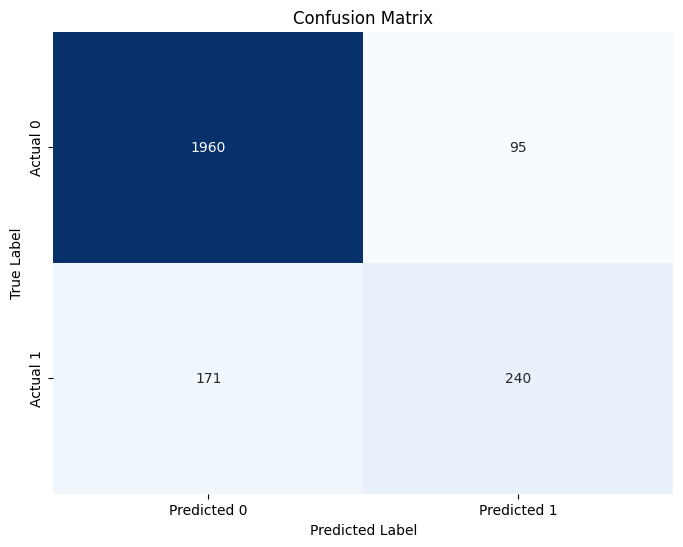


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      2055
           1       0.72      0.58      0.64       411

    accuracy                           0.89      2466
   macro avg       0.82      0.77      0.79      2466
weighted avg       0.89      0.89      0.89      2466



In [52]:
#gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
# Initialize model
gb_model = GradientBoostingClassifier(random_state=42)
# Fit model
gb_model.fit(X_train, y_train)
# Predict
y_pred = gb_model.predict(X_test)
#Evaluate the model
# Evaluation metrics
# Calculate the confusion matrix
cm = confusion_matrix(y_test_ready, y_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("\nClassification Report:\n", classification_report(y_test, y_pred))
